In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
#3 rows deleted:
#20484	,RegEx used to extract tokens from an ASCIIMath expression"	11		1	0	0	https://i.stack.imgur.com/6VcaB.png									0	1		0	0	0	0	0	1	0	0	0	1	1	0	0	0	0	0
#71350	,Bootstrap modal wont trigger on mobile"	443	Lake Mary, FL, United States	85	165	11	https://i.stack.imgur.com/TLzJW.png?s=128&g=1									0	1		0	0	0	0	0	3	0	0	0	1	1	0	0	0	0	0
#60036	<p>from group ""Value"" i can get the value of hour and it gives output as 1	3	2	4	5	6 and so on for each generator name but since no of hour is common to all i need that i get it only once that is i should get 1	2	5	6 only once</p>							0	1		0	0	0	0	0	1	0	0	0	1	1	0	1	0	0	0

openCloseData=pd.read_csv("openCloseData9.csv")
openCloseData.head()

#openCloseData.drop(20484,inplace=True)
#openCloseData.drop(71350,inplace=True)
#openCloseData.drop(60036,inplace=True)
#print(20484 in openCloseData.iloc[:,1])

,Unnamed: 0,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [3]:
print(openCloseData.shape)
openCloseData.drop(['Unnamed: 0'],inplace=True,axis=1)
print(openCloseData.shape)
#Actually 4 rows are removed

(159996, 47)
(159996, 46)


In [4]:
openCloseData.columns

Index(['AboutMe', 'Body', 'Comment', 'Downvotes', 'Location', 'PostId',
       'ProfileImageUrl', 'Reputation', 'SOUrlCount', 'Tags', 'Title',
       'Unnamed: 0.1', 'Upvotes', 'UserId', 'Views', 'WebsiteUrl',
       'aboutMeFilled', 'bodyWordCount', 'closed', 'codeLength',
       'colemanLiauIndex', 'countOfInterrogativeSent',
       'daleChallReadabilityScore', 'experienceInTime', 'firstLineLength',
       'fleschReadingEase', 'gunningFog', 'locationFilled', 'lowerUpperRatio',
       'numAns', 'numPR', 'numPeopleReached', 'numQues',
       'profileImageUrlFilled', 'punctuationCount', 'sentenceCount',
       'sentencesStartWithICount', 'sentencesStartWithYouCount',
       'shortWordCount', 'smogIndex', 'tagCount', 'tagWeightSum',
       'titleLengthInChars', 'urlCount', 'userProfileFilled',
       'websiteUrlFilled'],
      dtype='object')

In [5]:
openCloseData.head()

,AboutMe,Body,Comment,Downvotes,Location,PostId,ProfileImageUrl,Reputation,SOUrlCount,Tags,...,sentencesStartWithICount,sentencesStartWithYouCount,shortWordCount,smogIndex,tagCount,tagWeightSum,titleLengthInChars,urlCount,userProfileFilled,websiteUrlFilled
0,NaN,<p>Please someone explain complete step by ste...,100,0,NaN,32203002,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,kernel|minix,...,0,0,6,0.0,2,-110.462467,33,0,1,0
1,NaN,<p>I've used SFST language for my project on N...,100,0,NaN,31961877,https://lh4.googleusercontent.com/-_GtduZ_HroM...,6,0,python|nlp|transducer|fst,...,3,0,27,0.0,4,-157.135019,25,2,1,0
2,<p>Currently a software developer at HiQ Finla...,<p>The following JSON is returned from SharePo...,100,2413,"Helsinki, Finland",22080350,https://i.stack.imgur.com/w2whQ.png,33857,0,json|rest|powershell,...,0,0,25,0.0,3,-279.862500,134,0,4,1
3,<p>Love the computer science &amp; technology ...,<p>What's the benifit of allocating a chunk of...,100,3,中国Shanghai Shi,28019349,https://www.gravatar.com/avatar/a33ac21cad99e5...,1470,0,linux|memory-management|linux-kernel|memory-ad...,...,0,0,10,0.0,5,-234.970000,78,0,3,0
4,NaN,<p>I'm using an S3 bucket as the origin or a C...,100,77,NaN,32211159,NaN,10992,0,amazon-web-services|amazon-s3|cdn|amazon-cloud...,...,2,0,35,10.7,4,-527.002535,59,0,0,0


In [6]:
X = openCloseData.loc[:,['Reputation',
       'experienceInTime', 'Views',
       'Upvotes', 'Downvotes', 'tagCount', 'closed',
       'lowerUpperRatio','numAns','numQues',
       'sentenceCount', 'firstLineLength', 'codeLength',
       'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'tagWeightSum', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled'] ]


X.replace(np.nan,0,inplace=True)  #replacing NaN to 0
X.lowerUpperRatio.replace(np.inf,0,inplace=True)  #replacing infinity to 0
print(X.shape)
print(type(X))

(159996, 29)
<class 'pandas.core.frame.DataFrame'>


In [7]:
X.head()

,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,closed,lowerUpperRatio,numAns,numQues,...,shortWordCount,bodyWordCount,punctuationCount,tagWeightSum,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex,userProfileFilled
0,6,13,8,0,0,2,0,25.333333,0,2,...,6,17,1,-110.462467,13.86,71.14,7.27,0.0,9.74,1
1,6,0,8,0,0,4,0,9.500000,0,2,...,27,41,28,-157.135019,20.88,25.29,9.66,0.0,18.39,1
2,33857,664,2438,1574,2413,3,0,9.027027,1403,5,...,25,70,14,-279.862500,37.46,-7.03,10.95,0.0,15.11,4
3,1470,816,312,362,3,5,0,42.666667,25,108,...,10,25,4,-234.970000,19.60,29.18,8.67,0.0,13.41,3
4,10992,1846,667,269,77,4,0,27.727273,331,174,...,35,70,7,-527.002535,15.00,70.63,7.66,10.7,8.70,0


In [8]:
X[np.isinf(X).any(axis=1)]

,Reputation,experienceInTime,Views,Upvotes,Downvotes,tagCount,closed,lowerUpperRatio,numAns,numQues,...,shortWordCount,bodyWordCount,punctuationCount,tagWeightSum,gunningFog,fleschReadingEase,daleChallReadabilityScore,smogIndex,colemanLiauIndex,userProfileFilled


In [9]:
y = X.closed
X.drop(['closed'],inplace=True,axis=1)
print(y.shape)

(159996,)


In [10]:
X.columns

Index(['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio', 'numAns', 'numQues', 'sentenceCount',
       'firstLineLength', 'codeLength', 'urlCount', 'SOUrlCount',
       'titleLengthInChars', 'countOfInterrogativeSent',
       'sentencesStartWithYouCount', 'sentencesStartWithICount',
       'shortWordCount', 'bodyWordCount', 'punctuationCount', 'tagWeightSum',
       'gunningFog', 'fleschReadingEase', 'daleChallReadabilityScore',
       'smogIndex', 'colemanLiauIndex', 'userProfileFilled'],
      dtype='object')

In [11]:
# x=(x-u)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(X))
#print(scaler.mean_)
X=scaler.fit_transform(X)
print(type(X))
X = pd.DataFrame(X, columns=['Reputation', 'experienceInTime', 'Views', 'Upvotes', 'Downvotes',
       'tagCount', 'lowerUpperRatio','numAns','numQues', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'tagWeightSum', 'gunningFog',
       'fleschReadingEase', 'daleChallReadabilityScore', 'smogIndex',
       'colemanLiauIndex', 'userProfileFilled'])

<class 'numpy.ndarray'>


### Splitting data to Train - Test sets

In [12]:
#Train/Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(111997, 28)
(111997,)
(47999, 28)
(47999,)


### Training Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split


rf = RandomForestClassifier(n_estimators=50, max_depth = 20 , n_jobs = -1)
rf_model = rf.fit(X_train,y_train)

In [14]:
y_pred = rf_model.predict(X_test)

precision,recall,fscore,support = score(y_test,y_pred,pos_label=1,average='binary')
print("Precision : {} / Recall : {} / Accuracy : {} / ".format(round(precision,3),
                                                                round(recall,3),
                                                                round((y_pred==y_test).sum()/len(y_pred),3)))

Precision : 0.883 / Recall : 0.926 / Accuracy : 0.902 / 


### Evaluating Model's Performance

In [15]:
#Accuracy
np.mean(y_pred==y_test)

0.90174795308235589

In [16]:
print(classification_report(y_test,y_pred) )
print("Precision: "+str(precision_score(y_test, y_pred, average='macro')) )
print("Recall: "+str(recall_score(y_test, y_pred, average='macro')) )
print("F1 Score:"+str(f1_score(y_test, y_pred, average='macro')) )
print(precision_recall_fscore_support(y_test, y_pred, average='macro') )
# Precision, recall, fscore, support in order

             precision    recall  f1-score   support

          0       0.92      0.88      0.90     23916
          1       0.88      0.93      0.90     24083

avg / total       0.90      0.90      0.90     47999

Precision: 0.9027591831
Recall: 0.901661809496
F1 Score:0.901671432814
(0.90275918309988035, 0.90166180949577035, 0.90167143281374584, None)


In [17]:
#print(classification_report(y_test,y_pred))

### 5 Fold Cross Validation

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=5)
    
val_score = cross_val_score(rf,X,y,cv=k_fold,scoring='accuracy',n_jobs=-1)
print(val_score)

[ 0.81846875  0.81227538  0.89849683  0.87949623  0.77971187]


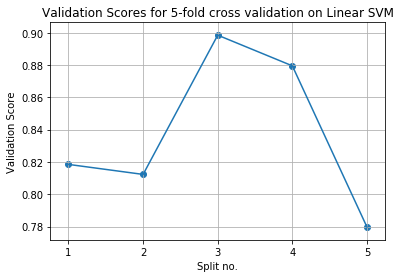

In [25]:
import matplotlib.pyplot as plt
plt.figure()

plt.plot(range(1, len(val_score) + 1), val_score)
plt.scatter(range(1, len(val_score) + 1), val_score)
plt.title('Validation Scores for 5-fold cross validation on Linear SVM')
plt.xlabel('Split no.')
plt.ylabel('Validation Score')
plt.xticks(range(1, len(val_score) + 1))
plt.grid(True)

plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[20972  2944]
 [ 1772 22311]]


In [21]:
y_train_pred = rf_model.predict(X_train)
print('Train Accuracy: ', np.mean(y_train == y_train_pred))

Train Accuracy:  0.996714197702


### Inspecting feature importance 

In [22]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.18729722349900602, 'punctuationCount'),
 (0.18224372349119022, 'codeLength'),
 (0.13129769201638392, 'colemanLiauIndex'),
 (0.063241268940396805, 'tagWeightSum'),
 (0.048830217533702897, 'fleschReadingEase'),
 (0.046436270511141166, 'gunningFog'),
 (0.046378333076057307, 'smogIndex'),
 (0.028521868340593334, 'bodyWordCount'),
 (0.027446017091479587, 'daleChallReadabilityScore'),
 (0.02623377365730347, 'experienceInTime')]

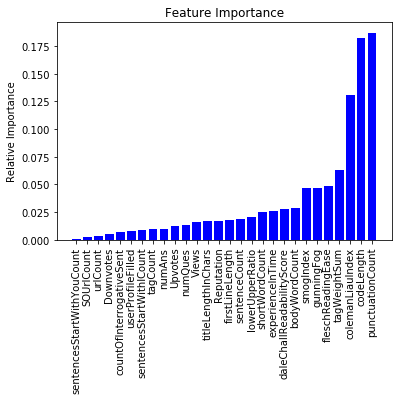

In [23]:
import matplotlib.pyplot as plt
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices],rotation='vertical')
plt.ylabel('Relative Importance')
plt.show()

/home/nidhi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


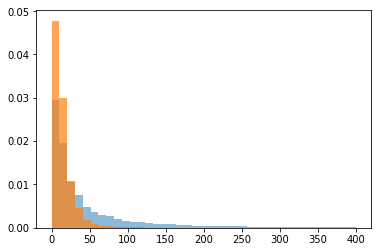

In [24]:
plt.hist(openCloseData[openCloseData['closed']==1]['punctuationCount'],bins=np.linspace(0,400,40),normed=True,label='Closed',alpha=0.5)
plt.hist(openCloseData[openCloseData['closed']==0]['punctuationCount'],bins=np.linspace(0,400,40),normed=True,label='Not Closed',alpha=0.7)

plt.show()